In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [18]:
wifi = pd.read_csv("dataset/dataset.csv")
del wifi["Unnamed: 12"]
wifi

,macro_zone,micro_zone,itis-wifi2,AP_SMART50,itis-wifi,AP_ITISLI03_5.0,wifi-lab01,AP_ITISLI02,itis-pvt,AP_SMART25,AP_ITISLI03_2.5,wifi-itis
0,smartlab,4,-79,-120,-77,-120,-78,-120,-78,-120,-120,-79
1,smartlab,4,-81,-120,-78,-120,-81,-120,-79,-120,-120,-86
2,smartlab,4,-78,-120,-85,-120,-81,-120,-84,-120,-120,-79
3,smartlab,4,-78,-120,-78,-120,-78,-120,-83,-120,-120,-84
4,smartlab,4,-79,-120,-78,-120,-78,-120,-83,-120,-120,-80
...,...,...,...,...,...,...,...,...,...,...,...,...
115,smartlab,2,-120,-120,-120,-120,-120,-120,-87,-120,-120,-87
116,smartlab,2,-87,-120,-87,-120,-88,-85,-120,-120,-120,-120
117,smartlab,2,-120,-120,-120,-120,-120,-83,-88,-120,-120,-87
118,smartlab,2,-87,-120,-120,-120,-89,-85,-90,-120,-120,-88


In [20]:
X = wifi[[col for col in wifi if col != 'macro_zone' and col != 'micro_zone']]
y = wifi["micro_zone"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

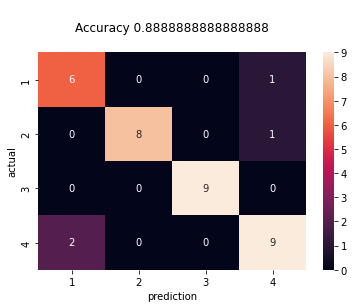

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline

sns.heatmap(
    pd.crosstab(
        y_test,
        y_pred,
        rownames=["actual"],
        colnames=["prediction"],
    ),
    annot=True,
)

accuracy = metrics.accuracy_score(y_test, y_pred)
plt.title(f"\nAccuracy {accuracy}\n")

plt.show()